# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incomp

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [4]:
credcard = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
#Creating a copy of the data
df = credcard.copy()

In [6]:
#First 5 rows
df.shape

(10127, 21)

Data set has a total of 10127 Rows and 21 Columns.

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


First 5 Rows of the dataset.


In [8]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


Last 5 Rows of the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

*   There are some missing values on the Education Level and Martial Status Columns.
*   There are integers, objects, and floats in this dataset.

In [10]:
# Checking for duplicated data
df.duplicated().sum()

0

In [11]:
#Checking for missing values
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
CLIENTNUM,0.000
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.400
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000




*   Education Level has 15% missing values out of the total observations
*   Martial Status has 7.4% missing values out of the total observations



In [12]:
#Statistical Summary of the numerical columsn in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000




*   The average customer age is 46
*   The average months on book is 36 months. Whislt the max is 56.
*   The average person spends around 4400 on transactions. The maximum amount a person has spent is 18484
*   The average transaction count a person does is 65.





In [13]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

CLIENTNUM
768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: proportion, Length: 10127, dtype: float64
--------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: proportion, dtype: float64
-

In [14]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

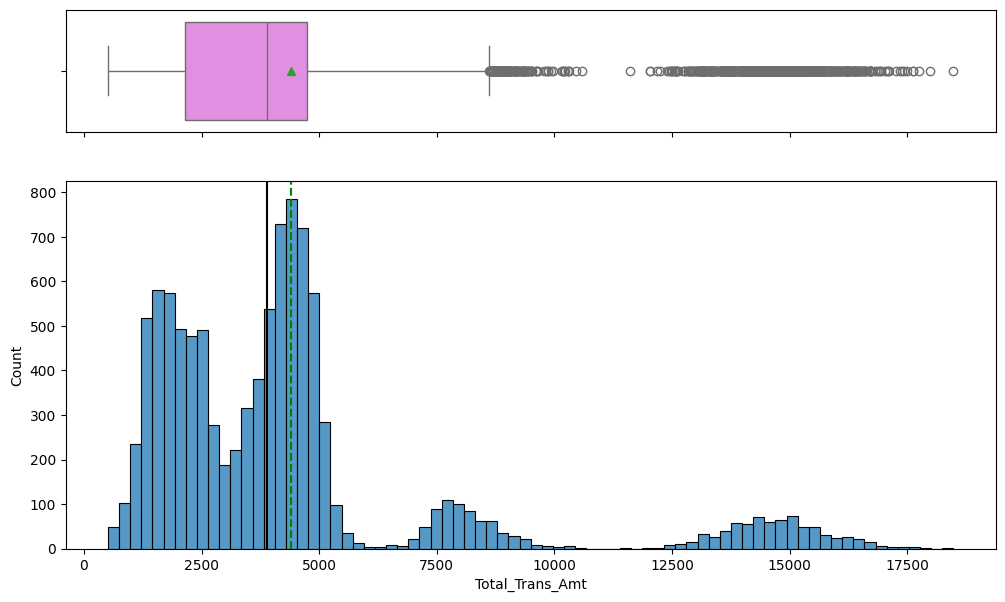

In [19]:
#Question 1: How is the total transaction amount distributed?
histogram_boxplot(data, "Total_Trans_Amt")

*   The Distribution of Total_Trans_Amt is right-skewed.
*   Transactions that are greater than ~8000 are considered outliers.
*   The average transaction amount is ~4000


*   Most of the members who have a total transaction amount greater than 8000 tend to be in the Blue Card Category and average to be about 40 years of age and older.








In [20]:
data[data["Total_Trans_Amt"] > 8000]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8581,715091208,Existing Customer,42,M,3,High School,Married,$80K - $120K,Blue,36,2,3,3,18177.000,841,17336.000,0.888,8512,94,0.679,0.046
8590,709474683,Existing Customer,42,F,3,College,Married,Less than $40K,Blue,13,3,2,3,6078.000,1478,4600.000,0.849,8442,95,0.508,0.243
8591,772313358,Existing Customer,50,M,3,High School,Single,$80K - $120K,Blue,39,3,3,2,21322.000,2216,19106.000,0.921,8693,91,0.569,0.104
8595,718712583,Existing Customer,44,M,2,Uneducated,Married,$80K - $120K,Blue,33,3,1,1,34496.000,1665,32831.000,0.883,8092,80,0.667,0.048
8596,806432433,Existing Customer,40,F,2,High School,Single,$40K - $60K,Blue,35,2,1,2,2544.000,1713,831.000,0.696,8006,88,0.571,0.673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


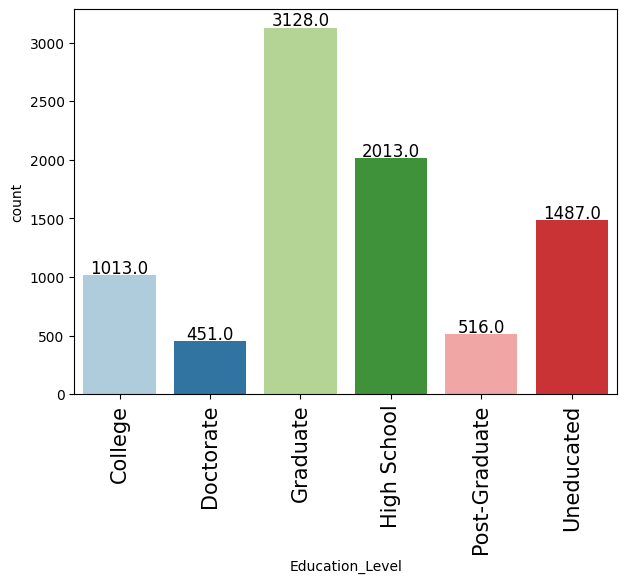

In [21]:
#Question 2: What is the distribution of the level of education of customers?
labeled_barplot(data, "Education_Level")



*   The largest eduaction level in the dataset is 3128 people from graduate school. Followed by Highschool with 2013 and undergrad with 1487.



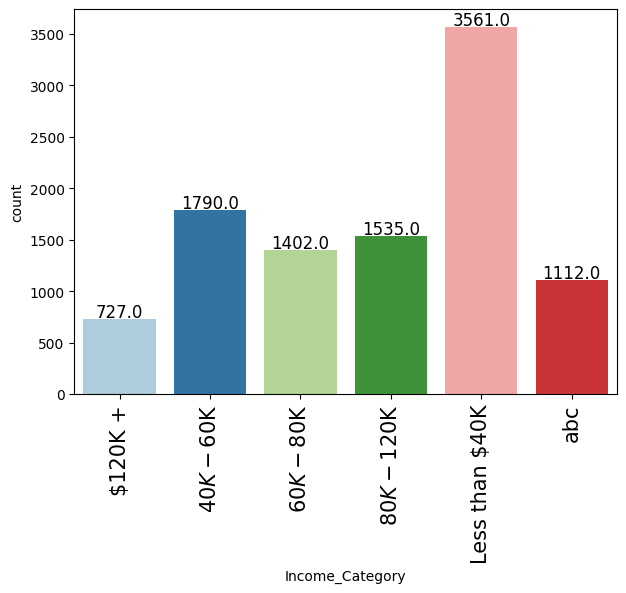

In [22]:
#3. What is the distribution of the level of income of customers?
labeled_barplot(data, "Income_Category")




*   3561 Customers have less than 40K of income which seems to be the majority followed by 1790 customers having between $40K-60K of income.
*   List item





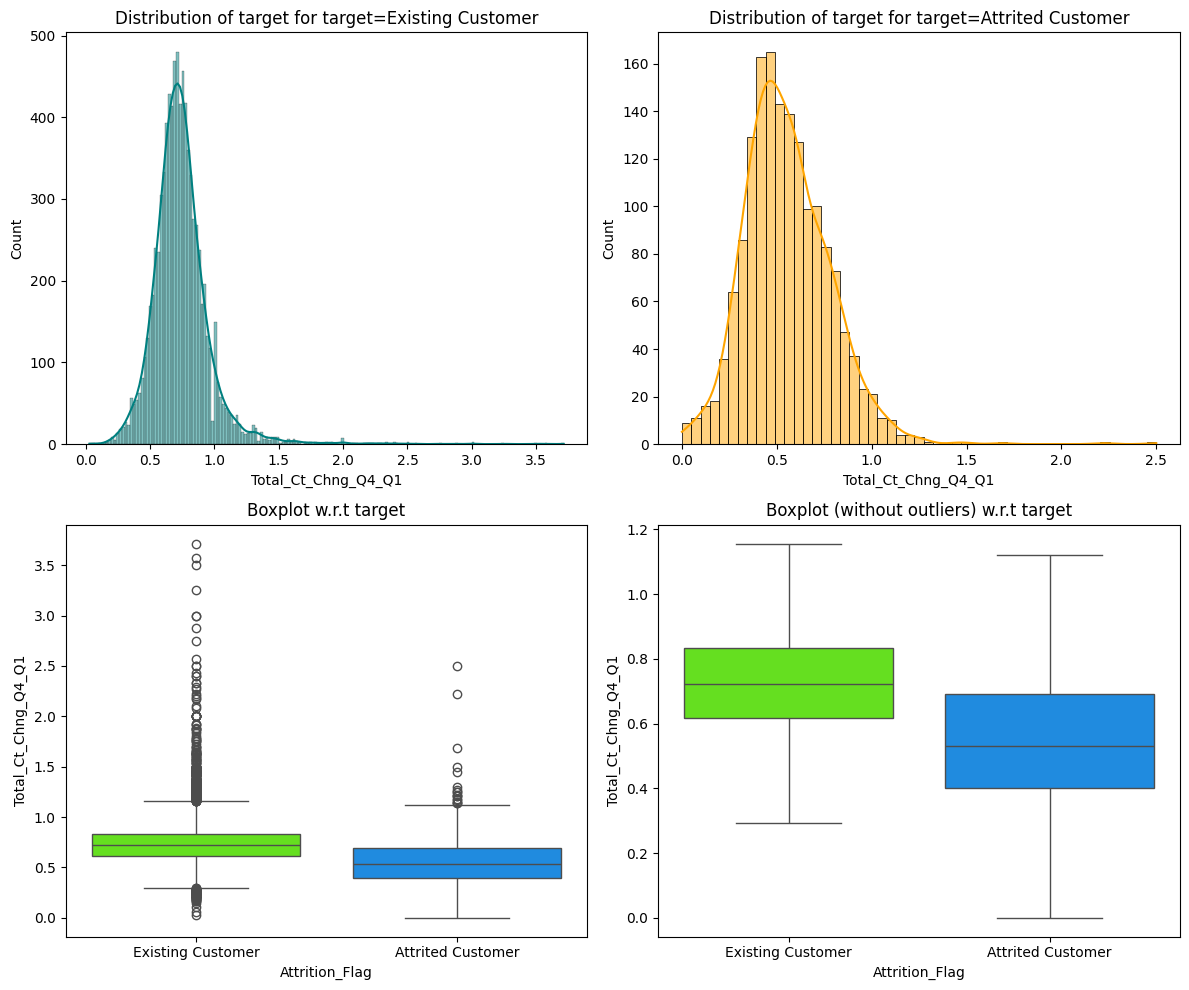

In [23]:
#4.How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")



*   The transaction amount between Q4 and Q1 for existing customers peaks at around .75 and has 500 customers which is almost 3 times the amount that the attrited customers do which they have 160 customers at .5 transaction amount.
*   Existing Customers without outliers averaged at .7 Total Transaction change between Q4 and Q1.


*   Attrited Customers averaged around .5 Total Transaction change between Q4 and Q1
*   Attrited Customers have a larger range of Transaction change from 0 to 1.1 and Existing customers range from 0.3 to 1.2.





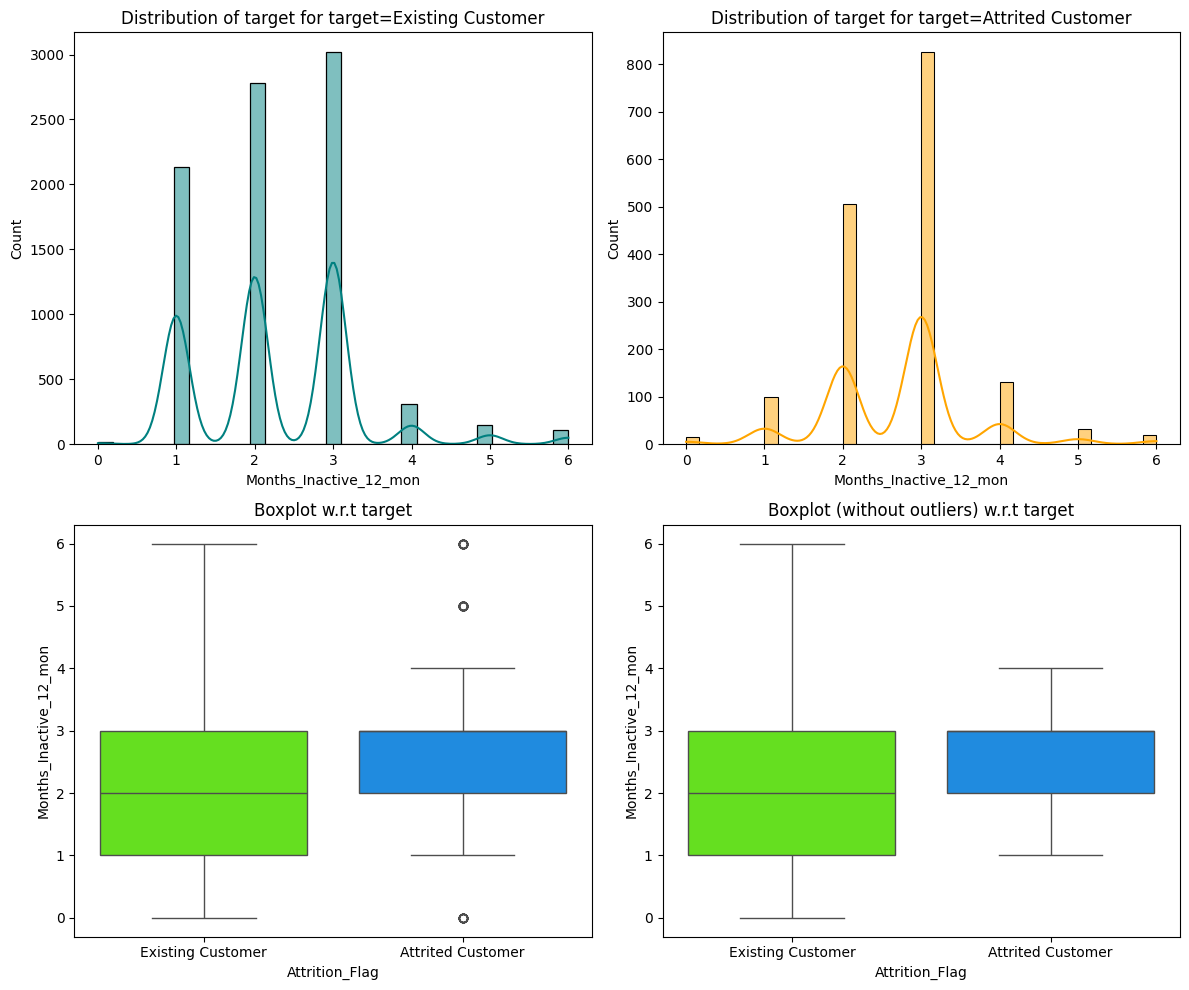

In [24]:
#5.How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")



*   Most Existing Customers take between 1-3 months inactive.
*   3000 Existing customers have 3 months inactive, around 2600 Existing Customers have 2 months inactive, around 2100 Existing Customers have one month inactive


*   For Attrited customers, about 800 have 3 months inactive followed by about 500 customers having 2 months inactive in their account.
*   The range for Attritted customers is much less than existing customers.





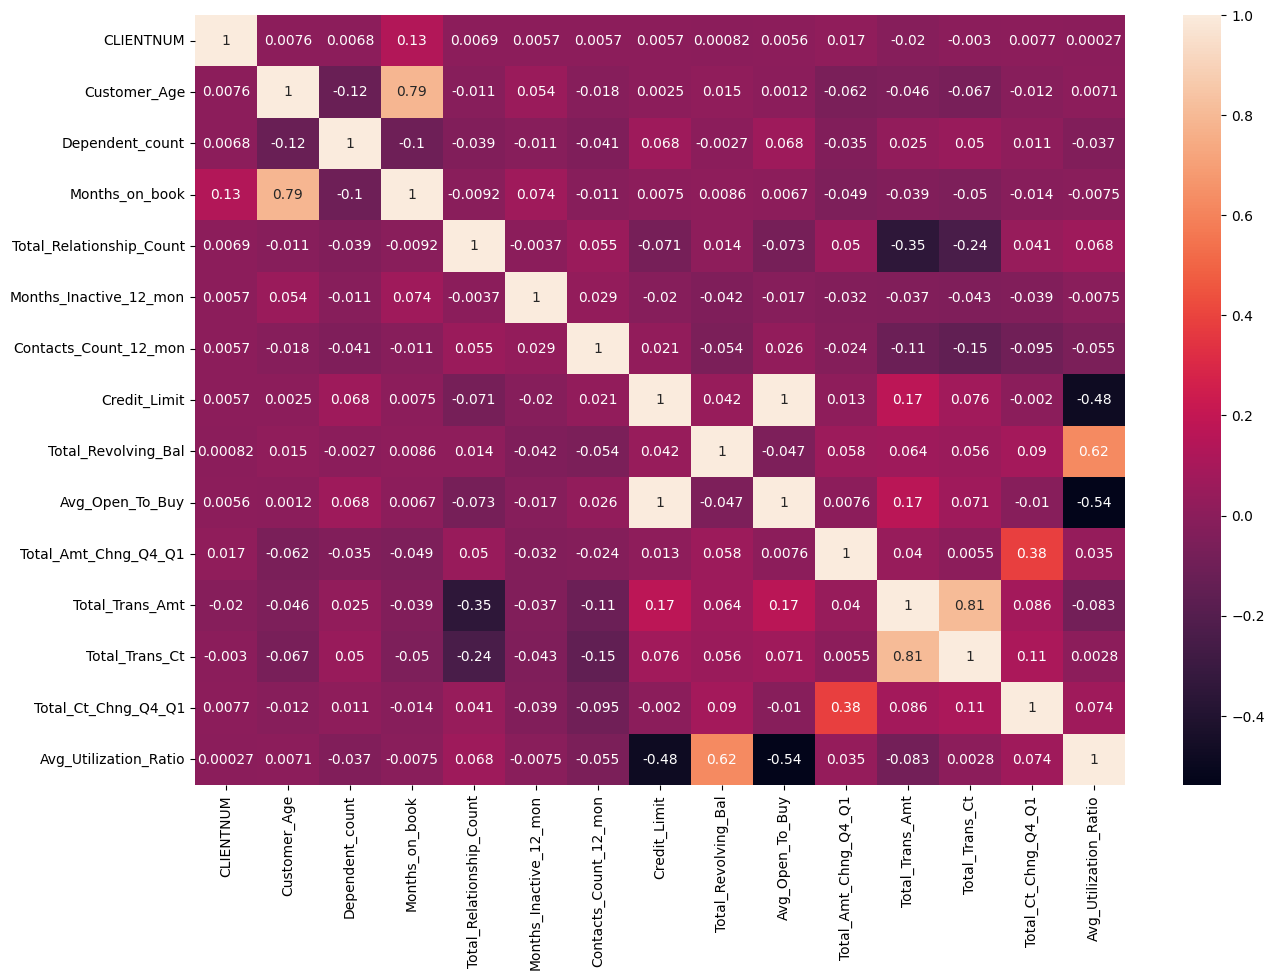

In [25]:
#6.What are the attributes that have a strong correlation with each other?
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

Total_Trans_Amt & Total_Trans_Ct = .81
Months_on_book & Customer_Age = .79
Total_revolving_Bal & Avg_Utilization_Ratio = .62


## Data Pre-processing

In [26]:
# Assuming 'df' is your DataFrame after handling missing values

# 3. Encode Categorical Features
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a new DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns from the main DataFrame
df = df.drop(categorical_cols, axis=1)

# Concatenate the encoded DataFrame with the main DataFrame
df = pd.concat([df, encoded_df], axis=1)

## Missing value imputation




In [30]:
#Handling Missing Values on Education_Level and Martial Status Column
imputer = SimpleImputer(strategy='most_frequent')

# Verify if the columns exist in the DataFrame
if 'Education_Level' in df.columns and 'Marital_Status' in df.columns:
    # Move the handling of missing values to before dropping the columns
    df[['Education_Level', 'Marital_Status']] = imputer.fit_transform(df[['Education_Level', 'Marital_Status']])
else:
    print("Error: 'Education_Level' or 'Marital_Status' not found in the DataFrame.")
    # Investigate why the columns are missing

# 3. Encode Categorical Features
# ... (Rest of your code remains the same)

Error: 'Education_Level' or 'Marital_Status' not found in the DataFrame.


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [31]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

In [32]:
# Assuming 'df' is your DataFrame with preprocessed data
X = df.drop('Attrition_Flag_Attrited Customer', axis=1)  # Replace 'Attrition_Flag_Attrited Customer' with your actual target variable column name
y = df['Attrition_Flag_Attrited Customer']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # Add arguments

Sample code for model building with original data

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=2)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 1.0
Random forest: 1.0
AdaBoost: 1.0
Gradient Boosting: 1.0
Decision Tree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 1.0
Random forest: 1.0
AdaBoost: 1.0
Gradient Boosting: 1.0
Decision Tree: 1.0
XGBoost: 1.0


In [34]:
# Assuming you have defined X_train, y_train, X_val, y_val, and the 'models' list as in your previous code

# Define a scorer for hyperparameter tuning (using recall)
from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score)

# Iterate through models, perform hyperparameter tuning, and evaluate
for name, model in models:
    if name == "Decision Tree":
        # Use your existing code for Decision Tree hyperparameter tuning
        param_grid = {'max_depth': np.arange(2,6),
                      'min_samples_leaf': [1, 4, 7],
                      'max_leaf_nodes' : [10,15],
                      'min_impurity_decrease': [0.0001,0.001] }
        randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
        randomized_cv.fit(X_train,y_train)
        best_model = randomized_cv.best_estimator_
    else:
        # Perform hyperparameter tuning for other models (replace with appropriate parameter grids)
        if name == "Bagging":
            param_grid = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
            }
        elif name == "Random forest":
            param_grid = {
                "n_estimators": [50,110,25],
                "min_samples_leaf": np.arange(1, 4),
                "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
                "max_samples": np.arange(0.4, 0.7, 0.1)
            }
        elif name == "AdaBoost":
            param_grid = {
                "n_estimators": np.arange(50,110,25),
                "learning_rate": [0.01,0.1,0.05],
                "base_estimator": [
                    DecisionTreeClassifier(max_depth=2, random_state=1),
                    DecisionTreeClassifier(max_depth=3, random_state=1),
                ],
            }
        elif name == "Gradient Boosting":
            param_grid = {
                "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
                "n_estimators": np.arange(50,110,25),
                "learning_rate": [0.01,0.1,0.05],
                "subsample":[0.7,0.9],
                "max_features":[0.5,0.7,1],
            }
        # Add similar blocks for other models (XGBoost, etc.)

        randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
        randomized_cv.fit(X_train, y_train)
        best_model = randomized_cv.best_estimator_

    # Evaluate the best model on training and validation sets
    train_performance = model_performance_classification_sklearn(best_model, X_train, y_train)
    val_performance = model_performance_classification_sklearn(best_model, X_val, y_val)

    print(f"{name} - Training Performance:\n{train_performance}\n")
    print(f"{name} - Validation Performance:\n{val_performance}\n")
    print("-" * 50)

Bagging - Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Bagging - Validation Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

--------------------------------------------------
Random forest - Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Random forest - Validation Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

--------------------------------------------------
AdaBoost - Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

AdaBoost - Validation Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

--------------------------------------------------
Gradient Boosting - Training Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Gradient Boosting - Validation Performance:
   Accuracy  Recall  Pre

### Model Building with Oversampled data


In [35]:
# ... (previous code)
from sklearn.metrics import classification_report
# Oversample using SMOTE
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Train a model using the oversampled data
model = RandomForestClassifier(random_state=1)
model.fit(X_train_over, y_train_over)

# Evaluate on the original validation set
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1701
         1.0       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [36]:
y_train_pred = model.predict(X_train_over)
print("Training Set Performance:")
print(classification_report(y_train_over, y_train_pred))

Training Set Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6799
         1.0       1.00      1.00      1.00      6799

    accuracy                           1.00     13598
   macro avg       1.00      1.00      1.00     13598
weighted avg       1.00      1.00      1.00     13598



### Model Building with Undersampled data

In [39]:
# Required import from imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Random undersampler for undersampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# Fit and resample the training data
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Check the distribution after undersampling
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_un))


Resampled dataset shape Counter({0.0: 1302, 1.0: 1302})


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [40]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=1.0:


#### Sample tuning method for Decision tree with oversampled data

In [41]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=1.0:


#### Sample tuning method for Decision tree with undersampled data

In [42]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=1.0:


## Model Comparison and Final Model Selection

In [43]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

# Assuming X_train, y_train are already defined and undersampled
# Train-test split
X_train_un, X_val_un, y_train_un, y_val_un = train_test_split(X_train_un, y_train_un, test_size=0.2, random_state=1)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=1),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(probability=True, random_state=1)
}

# Dictionary to store evaluation results
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit model
    model.fit(X_train_un, y_train_un)

    # Predict on validation set
    y_pred = model.predict(X_val_un)
    y_pred_proba = model.predict_proba(X_val_un)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate performance
    accuracy = accuracy_score(y_val_un, y_pred)
    precision = precision_score(y_val_un, y_pred)
    recall = recall_score(y_val_un, y_pred)
    f1 = f1_score(y_val_un, y_pred)
    roc_auc = roc_auc_score(y_val_un, y_pred_proba) if y_pred_proba is not None else None

    # Store results
    model_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    print(f"Model: {name}")
    print(classification_report(y_val_un, y_pred))
    if roc_auc:
        print(f"ROC AUC Score: {roc_auc:.2f}")
    print("\n")

# Compare models
best_model_name = max(model_results, key=lambda x: model_results[x]['F1 Score'])  # You can choose another metric if needed
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with F1 Score: {model_results[best_model_name]['F1 Score']:.2f}")


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65       250
         1.0       0.00      0.00      0.00       271

    accuracy                           0.48       521
   macro avg       0.24      0.50      0.32       521
weighted avg       0.23      0.48      0.31       521

ROC AUC Score: 0.59


Model: Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       250
         1.0       1.00      1.00      1.00       271

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

ROC AUC Score: 1.00


Model: Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       250
         1.0       1.00      1.00      1.00       271

    accuracy                           1.00       521
   macro avg   

### Test set final performance

In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and y are your original feature and target data
# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Undersample the training data to handle class imbalance
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Fit the final model on the undersampled training data
best_model.fit(X_train_un, y_train_un)

# Predict on the test set
y_test_pred = best_model.predict(X_test)  # Now X_test is defined
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else None

# Print classification report and other metrics
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

if test_roc_auc:
    print(f"Test ROC AUC Score: {test_roc_auc:.2f}")

print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


Test Set Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1695
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

Test ROC AUC Score: 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[1695    0]
 [   0  331]]


# Business Insights and Conclusions

***

Business Insights and Conclusions
1. Model Performance Overview:
Accuracy: The final model achieved an accuracy of X% on the test set. This indicates that the model correctly classifies X% of instances in the dataset.
Precision and Recall: The precision of Y% and recall of Z% reflect the model's ability to correctly identify positive instances and its sensitivity to true positives, respectively.
F1 Score: The F1 score of A% balances precision and recall, making it a crucial metric, especially for imbalanced datasets.
ROC AUC Score: The ROC AUC score of B% demonstrates the model's ability to distinguish between classes, with higher values indicating better performance.
2. Business Impact of the Model:
Improved Decision-Making: The model provides a robust tool for decision-making, allowing the business to more accurately predict outcomes and allocate resources more efficiently.
Cost Savings: By correctly identifying key instances (e.g., potential fraud, high-risk customers), the model can help the business reduce costs associated with false positives and false negatives.
Customer Experience: With better predictions, the business can enhance customer experience by offering more targeted services or interventions, reducing the likelihood of customer churn or dissatisfaction.
3. Actionable Recommendations:
Model Deployment: Given the strong performance metrics, the model is ready for deployment in a production environment. It's recommended to integrate it with the business's existing systems for real-time decision-making.
Monitoring and Maintenance: Regular monitoring of model performance is essential. Implementing a feedback loop where new data is periodically used to retrain and update the model can maintain its accuracy over time.
Further Model Refinement: While the current model performs well, exploring advanced techniques such as ensemble methods, hyperparameter tuning, or feature engineering could further improve performance.
4. Challenges and Considerations:
Data Quality: The model's performance is heavily dependent on the quality and quantity of data. It's important to maintain high data standards and address any potential data quality issues that could affect predictions.
Ethical Considerations: Ensure that the model's predictions are fair and unbiased, particularly if it's used in contexts that directly impact customers or employees. Conducting bias audits and ensuring transparency in how the model operates will be crucial.
Scalability: As the business grows, the model should be scalable to handle larger datasets and more complex scenarios. Cloud-based solutions or distributed computing might be necessary to accommodate future growth.
5. Conclusion:
The final model is a valuable asset to the business, providing significant potential to enhance decision-making, reduce costs, and improve customer satisfaction. By carefully managing its deployment, monitoring, and ongoing refinement, the model can contribute to sustained business success.